# Разведочный анализ данных (РАД) | Exploratory Data Analysis (EDA)

## Задание

1.   Выбрать какой-нибудь набор открытых данных
  - соревнования по машинному обучению (kaggle)
2. Загрузить и проверить формат файла
3. Прочитать данные в DataFrame
4. Запустить профилирование данных
5. Нужна ли очистка данных или дополнительная переработка какого-нибудь признака?
6. Повторное профилирование после очистки, видно ли что-нибудь новое?


## 1. Выбрать набор открытых данных (kaggle)

In [1]:
!pip install -q kaggle

kaggle token.json

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxkurnakov","key":"6835bf7fbf1246d254f1f9543c155761"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d asahu40/walmart-data-analysis-and-forcasting

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 65.2MB/s]


In [7]:
!unzip walmart-data-analysis-and-forcasting.zip

Archive:  walmart-data-analysis-and-forcasting.zip
  inflating: Walmart Data Analysis and Forcasting.csv  


## 2. Загрузить и проверить формат файла

In [8]:
!pwd # Текущая директория

/content


In [9]:
!cd /content

In [10]:
!ls

 kaggle.json  'Walmart Data Analysis and Forcasting.csv'
 sample_data   walmart-data-analysis-and-forcasting.zip


In [11]:
!ls -lh

total 488K
-rw-r--r-- 1 root root   67 May 22 14:59  kaggle.json
drwxr-xr-x 1 root root 4.0K May 18 13:38  sample_data
-rw-r--r-- 1 root root 356K Apr 26 07:07 'Walmart Data Analysis and Forcasting.csv'
-rw-r--r-- 1 root root 123K May 22 14:59  walmart-data-analysis-and-forcasting.zip


In [12]:
# минимальный анализ формата файла исходя из содержимого
!file *

kaggle.json:                              JSON data
sample_data:                              directory
Walmart Data Analysis and Forcasting.csv: CSV text
walmart-data-analysis-and-forcasting.zip: Zip archive data, at least v4.5 to extract


In [13]:
# размер в строках, словах и символах
!wc *

      0       1      67 kaggle.json
wc: sample_data: Is a directory
      0       0       0 sample_data
   6436    6436  363734 Walmart Data Analysis and Forcasting.csv
    478    2524  125153 walmart-data-analysis-and-forcasting.zip
   6914    8961  488954 total


In [14]:
# Начало и конец файла
!head -n 5 'Walmart Data Analysis and Forcasting.csv'
!echo ...
!tail -n 5 'Walmart Data Analysis and Forcasting.csv'

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
...
45,28-09-2012,713173.95,0,64.88,3.997,192.0135577,8.684
45,05-10-2012,733455.07,0,64.89,3.985,192.1704115,8.667
45,12-10-2012,734464.36,0,54.47,4,192.3272654,8.667
45,19-10-2012,718125.53,0,56.47,3.969,192.3308542,8.667
45,26-10-2012,760281.43,0,58.85,3.882,192.3088989,8.667


In [15]:
# Названия столбцов из переписи
!head -n1 'Walmart Data Analysis and Forcasting.csv'

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


## 3. Прочитать данные в DataFrame (pandas python)

In [16]:
import pandas as pd

In [17]:
w_df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
w_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
w_df.rename(columns={'Holiday_Flag':'IsHoliday'},inplace=True) # rename the column
w_df['IsHoliday'] = w_df['IsHoliday'].astype(bool)
w_df['Date'] = pd.to_datetime(w_df['Date'])

<ipython-input-18-9305a4d2f89c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  w_df['Date'] = pd.to_datetime(w_df['Date'])


In [19]:
from sklearn.model_selection import train_test_split

w_df_train, w_df_test = train_test_split(w_df, test_size=0.3, random_state=42)

print(f"Training examples: {w_df_train.shape[0]}")
print(f"Testing examples: {w_df_test.shape[0]}")

Training examples: 4504
Testing examples: 1931


In [20]:
for x in w_df:
  print(x)

Store
Date
Weekly_Sales
IsHoliday
Temperature
Fuel_Price
CPI
Unemployment


## 4. Запустить профилирование данных

In [21]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


In [22]:
w_df.shape

(6435, 8)

In [23]:
w_df.describe().T #transpose

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


### ydata-profiling (pandas-profiling)

In [24]:
!pip list | grep profiling

In [25]:
!pip install 'ydata-profiling'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ef8399f88798ca916db8c9b9764f088b17132ec831a64cfd4f2351513ad8a022
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [26]:
from ydata_profiling import ProfileReport
ProfileReport(w_df)

Output hidden; open in https://colab.research.google.com to view.

## 5. Нужна ли очистка данных или дополнительная переработка какого-нибудь признака?

### Пустые значения

In [27]:
w_df.info() # пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


In [28]:
w_df.isnull().any().any()

False

### Дораспознание признаков (выполняется ранее)

In [29]:
# w_df['IsHoliday'] = w_df['IsHoliday'].astype(bool)
# w_df['Date'] = pd.to_datetime(w_df['Date'])

### Повторяющаяся информация и проверка своих ожиданий

In [30]:
print(w_df["Store"].nunique(), "|",
      w_df["Date"].nunique(), "|",
      w_df["Weekly_Sales"].nunique(), "|",
      w_df["IsHoliday"].nunique(), "|",
      w_df["Temperature"].nunique(), "|",
      w_df["Fuel_Price"].nunique(), "|",
      w_df["CPI"].nunique(), "|",
      w_df["Unemployment"].nunique())

45 | 143 | 6435 | 2 | 3528 | 892 | 2145 | 349


## 6. Визуализация
В profile report видно не все интересные закономерности, но данные pandas удобно визуализировать любым нужным вам способом

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [32]:
plot_w_df = w_df

In [33]:
plot_w_df = plot_w_df.drop("Store", axis=1)
plot_w_df = plot_w_df.drop("Date", axis=1)
plot_w_df = plot_w_df.drop("Weekly_Sales", axis=1)
plot_w_df = plot_w_df.drop("IsHoliday", axis=1)
plot_w_df = plot_w_df.drop("Temperature", axis=1)
plot_w_df = plot_w_df.drop("Fuel_Price", axis=1)
#plot_w_df = plot_w_df.drop("CPI", axis=1)
#plot_w_df = plot_w_df.drop("Unemployment", axis=1)

<Axes: >

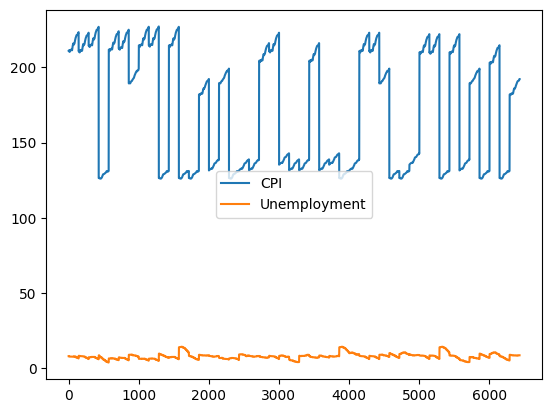

In [34]:
plot_w_df.plot()

## 7. Дополнительная информация

### Stores on week

Cредние еженедельные продажи для каждого магазина (45) в будни и выходные

In [35]:
store_holiday_table = pd.pivot_table(w_df, index='Store', columns='IsHoliday',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_holiday_table)

IsHoliday,False,True
Store,,
1,1.546957e+06,1665747.656
2,1.914209e+06,2079266.900
3,4.000648e+05,437811.050
4,2.083556e+06,2243102.624
5,3.148923e+05,359501.607
6,1.555993e+06,1680907.927
7,5.629645e+05,672400.265
8,9.037434e+05,975330.860
9,5.405993e+05,588950.821


Для избежания некорректных значений отрежим значения продаж менее 0

In [36]:
w_df = w_df.loc[w_df['Weekly_Sales'] > 0]
w_df

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,False,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,True,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,False,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,False,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,False,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,False,56.47,3.969,192.330854,8.667


In [37]:
w_df.shape

(6435, 8)

### Date

Узнаем какие даты присутствуют в датасете

In [38]:
w_df['Date'].head(5).append(w_df['Date'].tail(5)) # first and last 5 rows.

<ipython-input-38-24a899bfb307>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df['Date'].head(5).append(w_df['Date'].tail(5)) # first and last 5 rows.


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, dtype: datetime64[ns]

Данные с 5 февраля 2010 по 26 октября 2012

### Holiday

Узнаем влияние выходных и праздников на продажи

In [39]:
import seaborn as sns

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

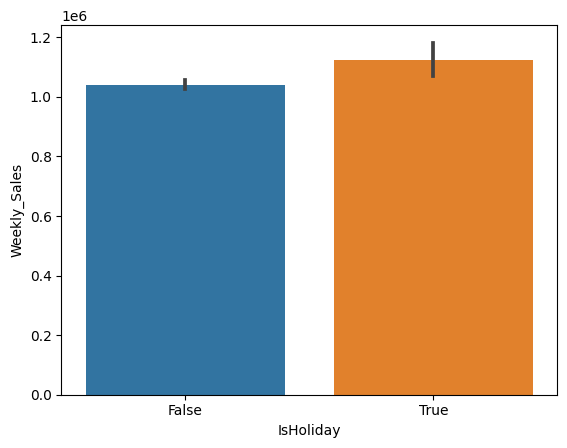

In [40]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=w_df)

Уникальные даты выходных (избранные выходные)

In [41]:
w_df[w_df["IsHoliday"] == True]['Date'].unique()

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

количество записей не выходных

In [42]:
w_df[w_df["IsHoliday"] != True]['Date'].nunique()

133

#### Посмотрим различия между праздниками

In [43]:
w_df.loc[(w_df['Date'] == '2010-12-02T00:00:00.000000000')|(w_df['Date'] == '2010-12-31T00:00:00.000000000')|(w_df['Date'] == '2011-12-30T00:00:00.000000000'),'December'] = True
w_df.loc[(w_df['Date'] != '2010-12-02T00:00:00.000000000')&(w_df['Date'] != '2010-12-31T00:00:00.000000000')&(w_df['Date'] != '2011-12-30T00:00:00.000000000'),'December'] = False

w_df.loc[(w_df['Date'] == '2010-11-26T00:00:00.000000000')|(w_df['Date'] == '2011-11-02T00:00:00.000000000')|(w_df['Date'] == '2011-11-25T00:00:00.000000000'),'November'] = True
w_df.loc[(w_df['Date'] != '2010-11-26T00:00:00.000000000')&(w_df['Date'] != '2011-11-02T00:00:00.000000000')&(w_df['Date'] != '2011-11-25T00:00:00.000000000'),'November'] = False

w_df.loc[(w_df['Date'] == '2012-10-02T00:00:00.000000000')|(w_df['Date'] == '2010-10-09T00:00:00.000000000'),'October'] = True
w_df.loc[(w_df['Date'] != '2012-10-02T00:00:00.000000000')&(w_df['Date'] != '2010-10-09T00:00:00.000000000'),'October'] = False

w_df.loc[(w_df['Date'] == '2011-09-09T00:00:00.000000000')|(w_df['Date'] == '2012-07-09T00:00:00.000000000'),'Julember'] = True
w_df.loc[(w_df['Date'] != '2011-09-09T00:00:00.000000000')&(w_df['Date'] != '2012-07-09T00:00:00.000000000'),'Julember'] = False

<Axes: xlabel='December', ylabel='Weekly_Sales'>

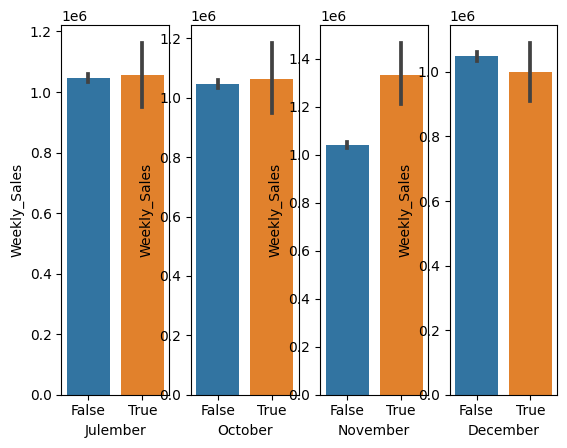

In [44]:
fig, axs = plt.subplots(ncols=4)

sns.barplot(x='Julember', y='Weekly_Sales', data=w_df, ax = axs[0]) 
sns.barplot(x='October', y='Weekly_Sales', data=w_df, ax = axs[1])
sns.barplot(x='November', y='Weekly_Sales', data=w_df, ax = axs[2])
sns.barplot(x='December', y='Weekly_Sales', data=w_df, ax = axs[3]) 

### Holiday effect on Stores

In [45]:
w_df.groupby(['November'])['Weekly_Sales'].mean()  # Avg weekly sales for Stores in November

November
False    1.040868e+06
True     1.331487e+06
Name: Weekly_Sales, dtype: float64

Проценты для каждого магазина

In [46]:
import matplotlib as mpl

In [47]:
w_df.nlargest(5, 'Weekly_Sales')

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,December,November,October,Julember
1905,14,2010-12-24,3818686.45,False,30.59,3.141,182.544590,8.724,False,False,False,False
2763,20,2010-12-24,3766687.43,False,25.17,3.141,204.637673,7.484,False,False,False,False
1333,10,2010-12-24,3749057.69,False,57.06,3.236,126.983581,9.003,False,False,False,False
527,4,2011-12-23,3676388.98,False,35.92,3.103,129.984548,5.143,False,False,False,False
1762,13,2010-12-24,3595903.20,False,34.90,2.846,126.983581,7.795,False,False,False,False


In [48]:
Total = w_df['Weekly_Sales'].sum()
Total

6737218987.11

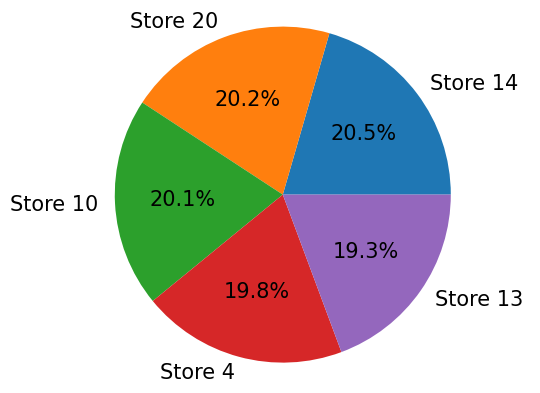

In [49]:
my_data = [3818686.45/Total, 3766687.43/Total, 3749057.69/Total, 3676388.98/Total, 3595903.20/Total  ]  #percentages
my_labels = 'Store 14','Store 20', 'Store 10', 'Store 4', 'Store 13' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [50]:
w_df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    1.041256e+06
True     1.122888e+06
Name: Weekly_Sales, dtype: float64

### Глобальная статистика по времени

In [51]:
w_df['week'] =w_df['Date'].dt.week
w_df['month'] =w_df['Date'].dt.month 
w_df['year'] =w_df['Date'].dt.year

<ipython-input-51-a2421435e53b>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  w_df['week'] =w_df['Date'].dt.week


In [52]:
w_df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [53]:
w_df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

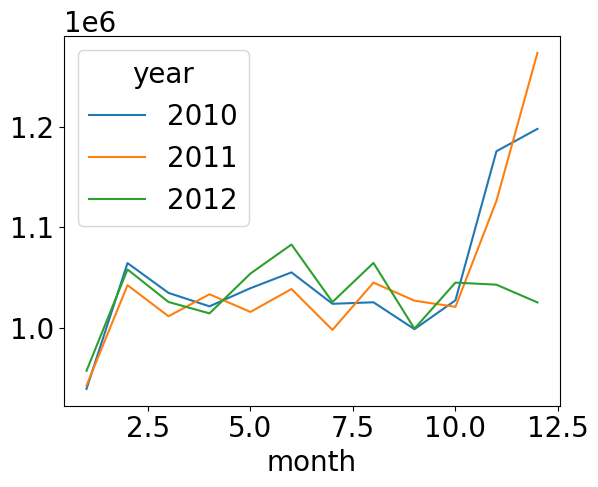

In [54]:
monthly_sales = pd.pivot_table(w_df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

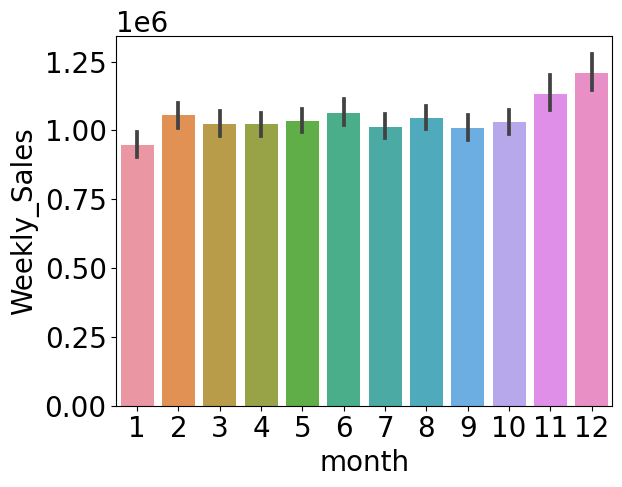

In [55]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=w_df)

In [56]:
w_df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    1.754774e+06
47    1.471273e+06
50    1.244704e+06
23    1.133040e+06
7     1.090298e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

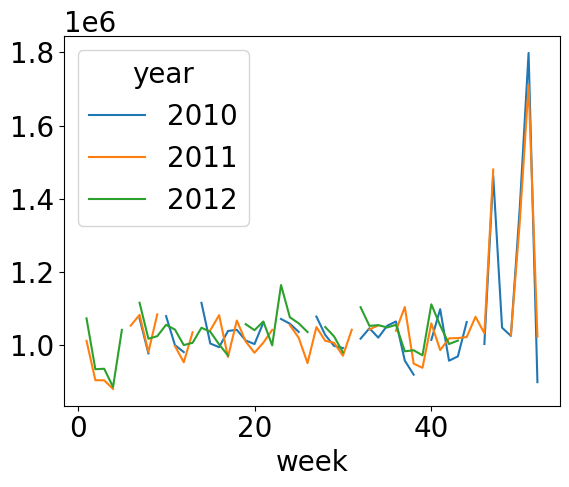

In [57]:
weekly_sales = pd.pivot_table(w_df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

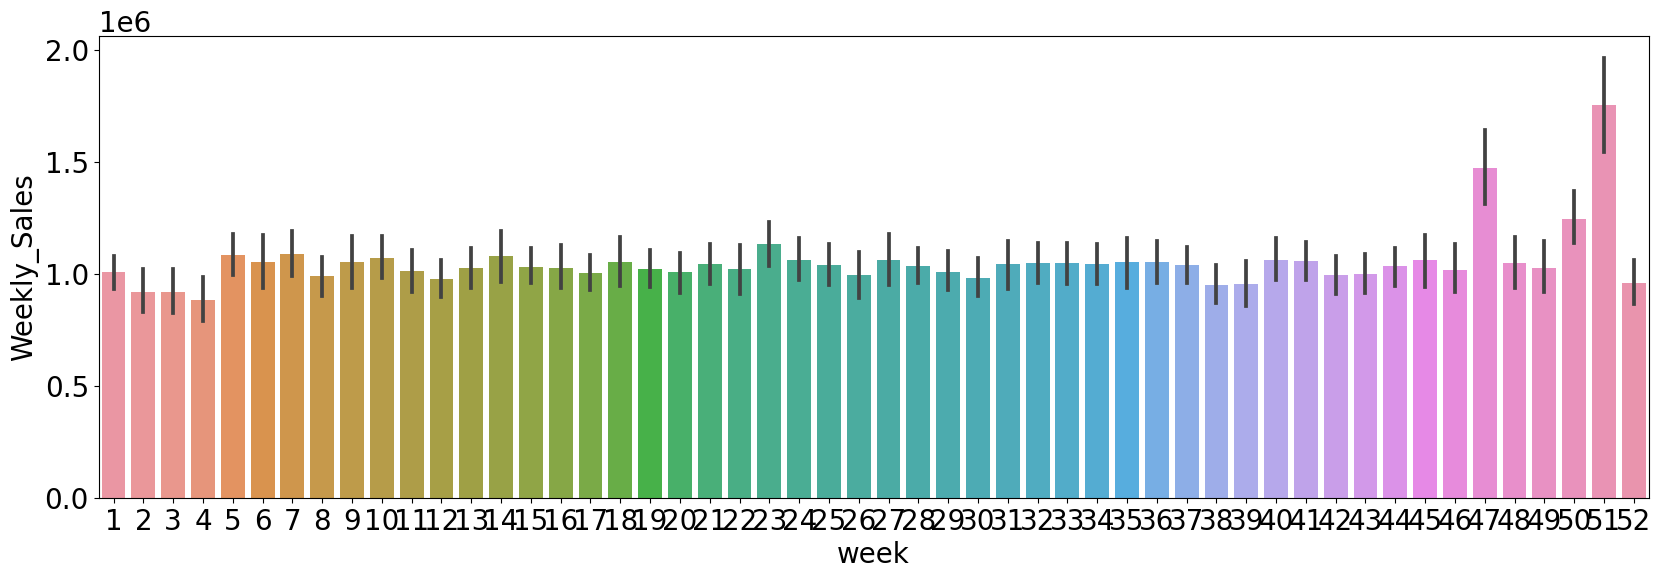

In [58]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=w_df)

#### Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

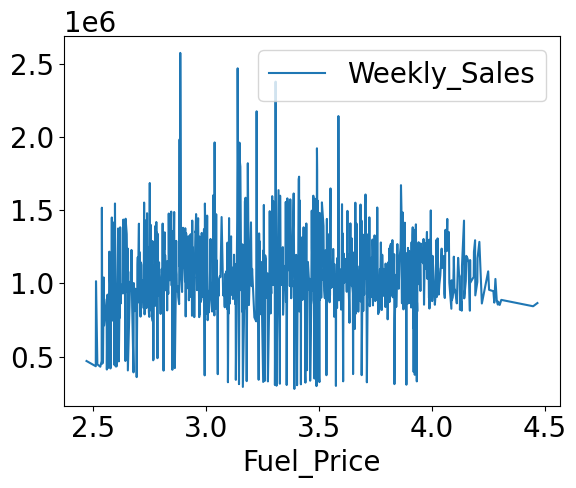

In [59]:
fuel_price = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

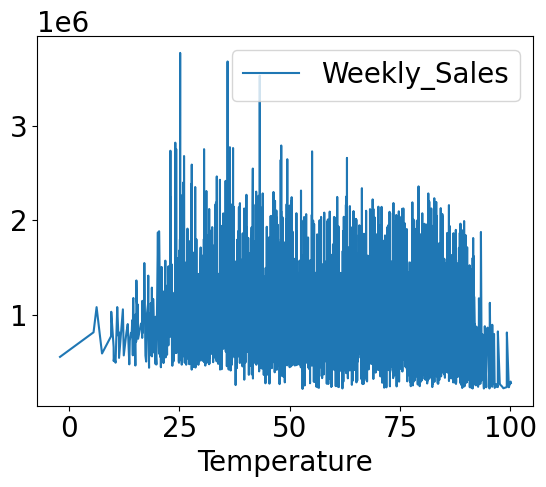

In [60]:
temp = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

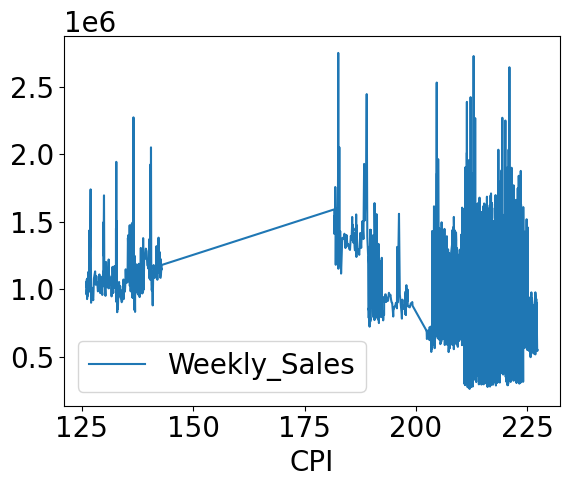

In [61]:
CPI = pd.pivot_table(w_df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

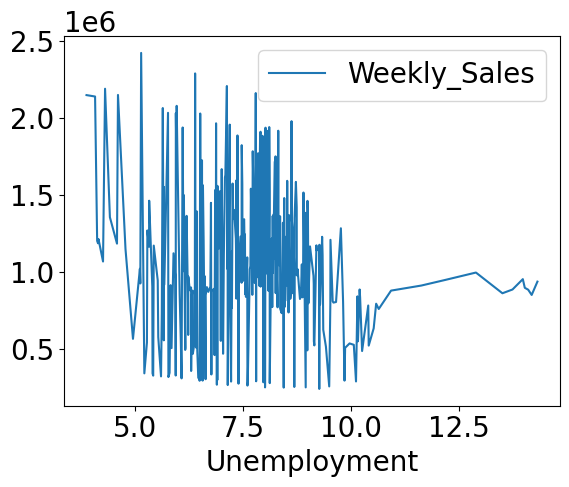

In [62]:
unemployment = pd.pivot_table(w_df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

## Выводы

Данные не содержат пропущенных значений. Все столбцы были проверены.

* В данных 45 магазинов.
* 5 магазинов имеющих самые высокие продажи практически равны между собой
* Средние продажи в праздничные дни выше, чем в обычные дни.
* Подарки к Рождеству покупаются на 51-й неделе
** В 2010 году продажи к Рождеству были выше, чем в 2011 и 2012 (неизвестно) годах. Однако в данных за 2012 год отсутствуют продажи в ноябре и декабре. Даже без учета месяцев с самыми высокими продажами, 2012 год не значительно уступает 2010 году, поэтому после добавления двух последних месяцев он может занять первое место.
* В осенние праздники покупок меньше чем в любое другое время года
* Посреди лета небольшой всплеск
* Индекс потребительских цен, температура, уровень безработицы и цена на топливо не влияют на еженедельные продажи.

# Регрессия

## Задание

1. Применить линейную регрессию к паре зависимых переменных в собственном наборе данных.
2. Нарисовать график точек в пространстве x и y с линией.
3. Кроссвалидацией оценить ошибку (желательно r2_score).
4. При той же зависимой переменной y взять в качестве независимых переменных больше переменных набора данных.
  - Оценить ошибку кроссвалидацией с той же выборкой
  - Стало ли предсказание y точнее за счет того, что у модели больше информации?


## Данные
Извлекаем интересующие нас данные

### Поиск подходящих параметров

In [63]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   December      6435 non-null   object        
 9   November      6435 non-null   object        
 10  October       6435 non-null   object        
 11  Julember      6435 non-null   object        
 12  week          6435 non-null   int64         
 13  month         6435 non-null   int64         
 14  year          6435 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64

<Axes: xlabel='week'>

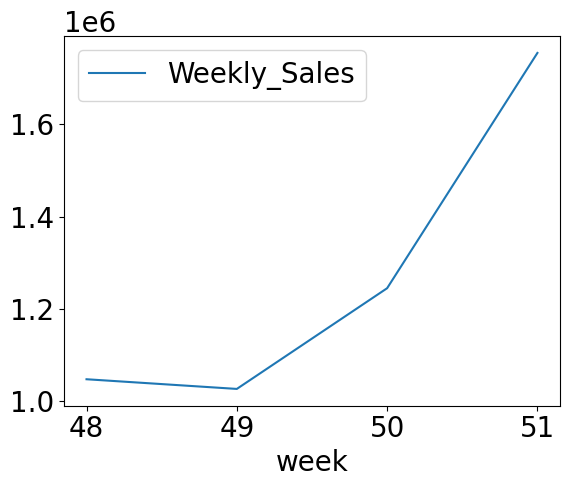

In [64]:
q = pd.pivot_table(w_df.loc[((w_df['week'].isin([48,49,50,51])))], values = "Weekly_Sales", index= "week")
q.plot()

<Axes: xlabel='week'>

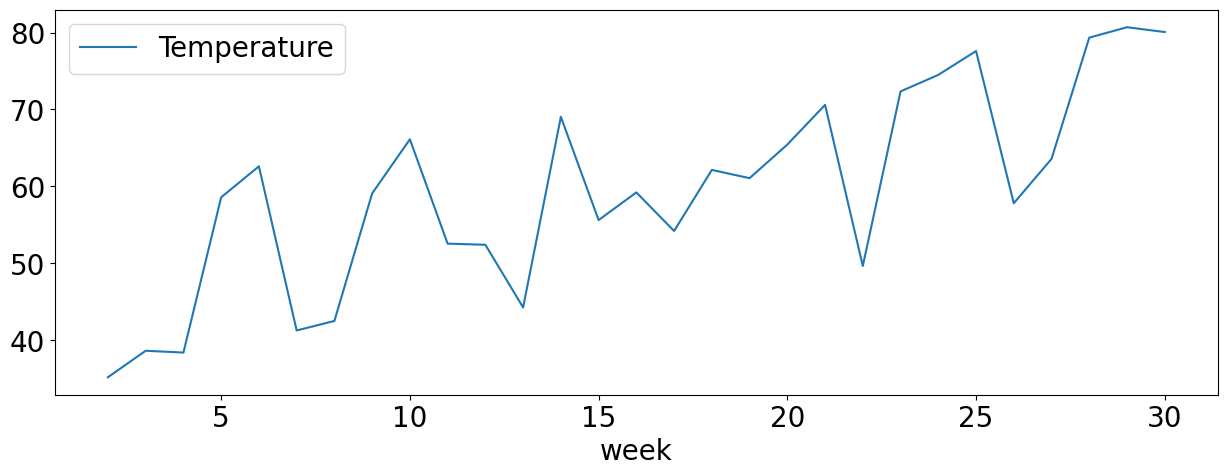

In [65]:
temp = pd.pivot_table(w_df.loc[((w_df['week'].isin(range(2,31))))], values = "Temperature", index= "week")
temp.plot(figsize=(15, 5))

### Извлечение подходящих данных

In [66]:
w_df_temp = w_df.loc[((w_df['week'].isin(range(2,31))))]
w_df_temp

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,December,November,October,Julember,week,month,year
0,1,2010-05-02,1643690.90,False,42.31,2.572,211.096358,8.106,False,False,False,False,17,5,2010
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,False,False,False,False,7,2,2010
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,False,False,False,False,8,2,2010
4,1,2010-05-03,1554806.68,False,46.50,2.625,211.350143,8.106,False,False,False,False,18,5,2010
6,1,2010-03-19,1472515.79,False,54.58,2.720,211.215635,8.106,False,False,False,False,11,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,45,2012-07-20,737613.65,False,78.89,3.567,191.167043,8.684,False,False,False,False,29,7,2012
6421,45,2012-07-27,711671.58,False,77.20,3.647,191.165566,8.684,False,False,False,False,30,7,2012
6422,45,2012-03-08,725729.51,False,76.58,3.654,191.164090,8.684,False,False,False,False,10,3,2012
6427,45,2012-07-09,766512.66,True,75.70,3.911,191.577676,8.684,False,False,False,True,28,7,2012


### Исследуемые параметры

<Axes: xlabel='week'>

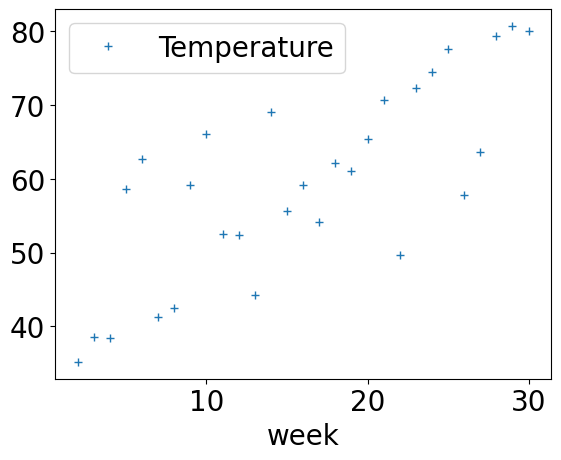

In [67]:
# data = w_df_temp[['week', 'Temperature']].set_index('week').sort_index()[['Temperature']]
data = w_df_temp[['week', 'Temperature']].set_index('week').groupby('week').mean().sort_index()[['Temperature']]

data.plot(style='+')

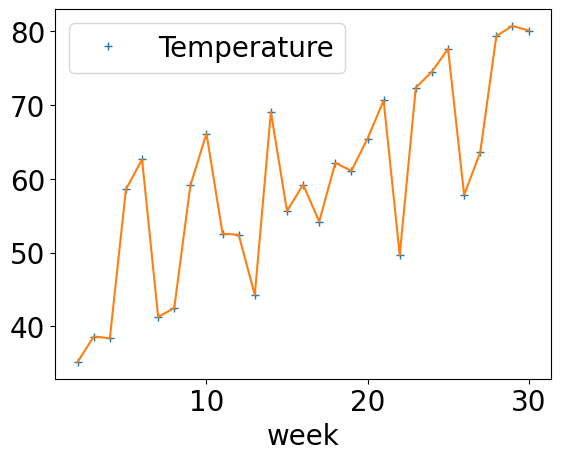

In [68]:
data.plot(style='+')
plt.plot(data)
plt.show()

In [69]:
# data = data.reset_index()
# data.info()

## Интерполяция

### линейная

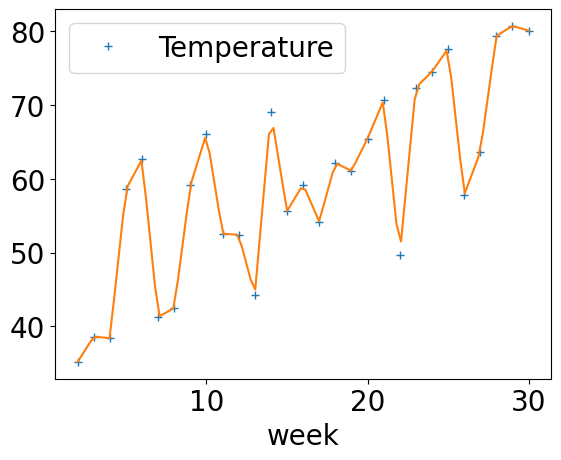

In [70]:
from scipy import interpolate
interpolation = interpolate.interp1d(data.index, data.Temperature, kind='linear')

data.plot(style='+')
xx = np.linspace(data.index.min(), data.index.max(), 100)
plt.plot(xx, interpolation(xx))
plt.show()

### квадратичная

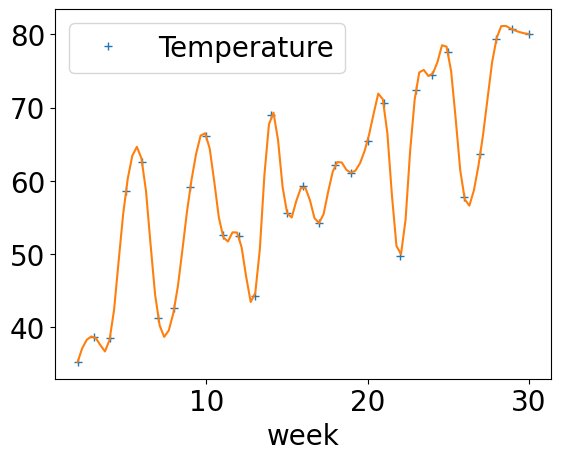

In [71]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Temperature, kind='quadratic')(xx))
plt.show()

### уровневая

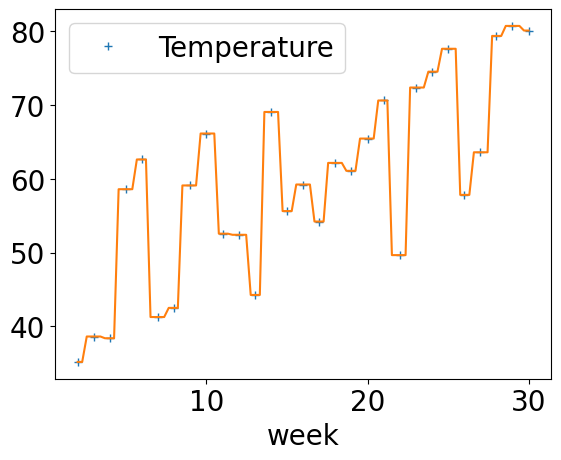

In [72]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Temperature, kind='nearest')(xx))
plt.show()

## Регрессии (температура + недели)

### Линейная регрессия

In [73]:
# приведение данных к формату, подходящему sklearn

X = data.index.to_numpy().reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(29, 1) (100, 1)


In [74]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(X, data.Temperature)

# свойства модели, добавленные в результате обучения
print(linear.coef_, linear.intercept_)

[1.19601254] 40.330914887794194


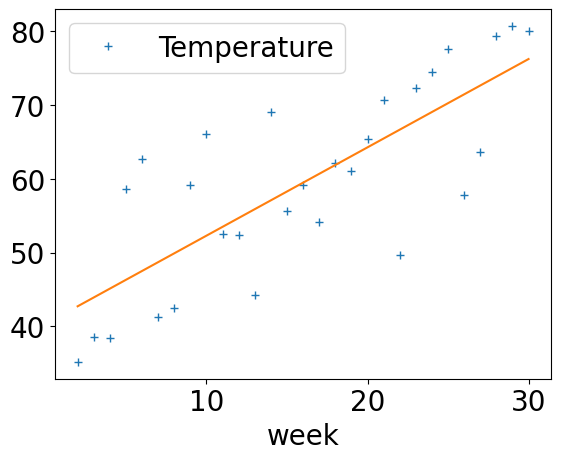

In [75]:
prediction = linear.predict(xx)
data.plot(style='+')
plt.plot(xx, prediction)
plt.show()

### Полиномиальная регрессия

array([[  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.],
       [  1.,  27., 729.],
       [  1.,  28., 784.],
       [  1.,  29., 841.],
       [  1.,  30., 900.]])

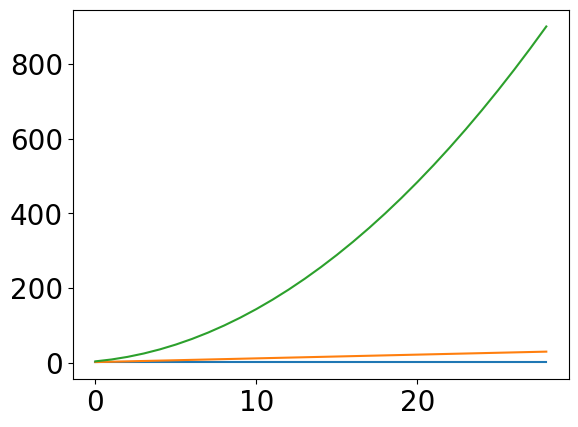

In [76]:
# посмотрим на результат работы препроцессора:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(X)
plt.plot(x2)
x2

In [77]:
# y = a0 + a1 * x + a2 * x**2
model_square = LinearRegression(fit_intercept=False).fit(x2, data.Temperature)
# три параметра оптимальной параболы: [a0, a1, a2]
model_square.coef_

array([4.04754628e+01, 1.17114408e+00, 7.77139372e-04])

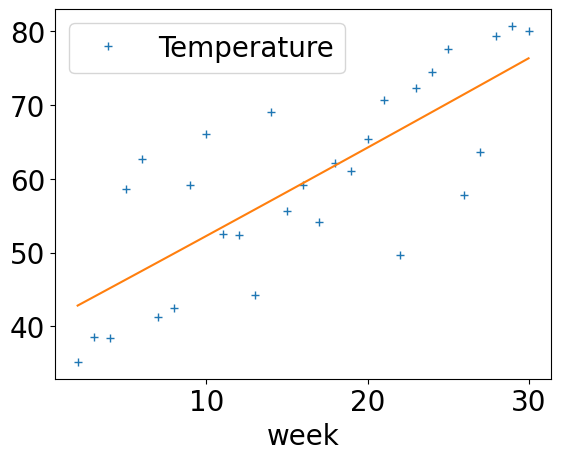

In [78]:
data.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model_square.predict(xx2))
plt.show()

В `Pipeline` хранятся все этапы рабочего процесса в виде единого объекта. Даже с двумя этапами полиномиальной регрессии это уже удобно:

array([ 2.07473284e+01,  1.34123925e+01, -8.69881774e+00,  4.13938721e+00,
       -1.00068537e+00,  1.34878991e-01, -1.08669486e-02,  5.36132330e-04,
       -1.58759151e-05,  2.59008544e-07, -1.78897075e-09])

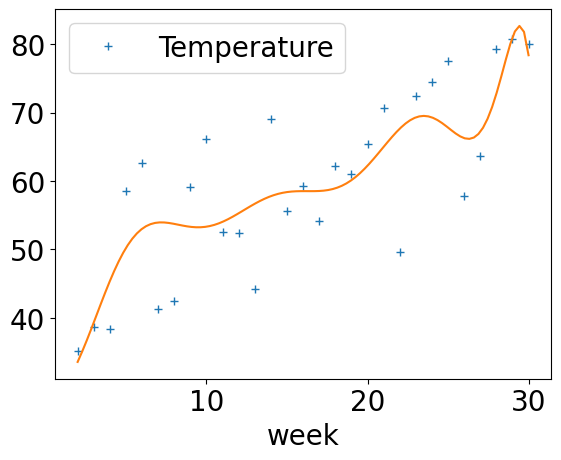

In [79]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(X, data.Temperature)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

## Оценка качества обучения и борьба с переобучением
Посмотрим как улучшается качество ответа (результат применения функции потерь) по мере применения все более и более "сильной" модели - полинома все более высокой степени.

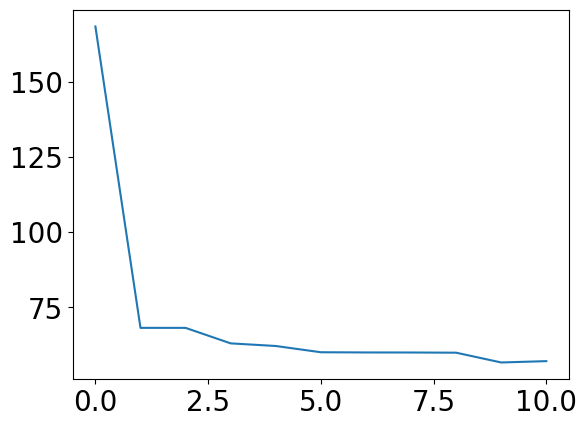

In [80]:
from sklearn.metrics import mean_squared_error
score = []
for n in range(11):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(X, data.Temperature)
  score.append(mean_squared_error(data.Temperature, model.predict(X)))
plt.plot(score)
plt.show()

### Валидация


In [81]:
# Разделим данные на обучающий и валидационный (тестовый) набор
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(data.index.values.reshape(-1, 1), data['Temperature'], random_state=3)
print([d.shape for d in (Xtr, Xtest, Ytr, Ytest)])

[(21, 1), (8, 1), (21,), (8,)]


In [82]:
# Посмотрим как улучшается качество ответа с ростом модели:
train_score=[]
test_score=[]
for n in range(5):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(Xtr, Ytr)
  train_score.append(mean_squared_error(Ytr, model.predict(Xtr)))
  test_score.append(mean_squared_error(Ytest, model.predict(Xtest)))

<Axes: >

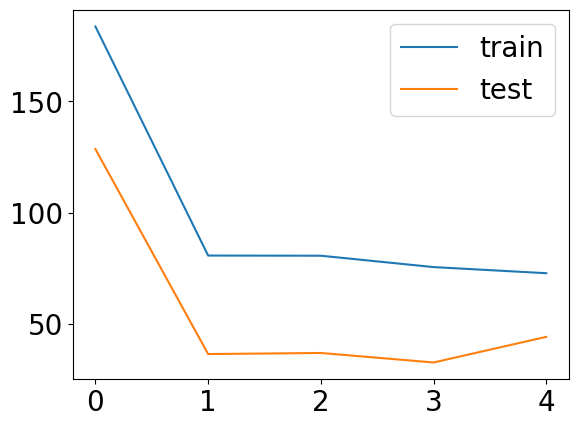

In [83]:
score = pd.DataFrame({'train': train_score, 'test': test_score})
score.plot()

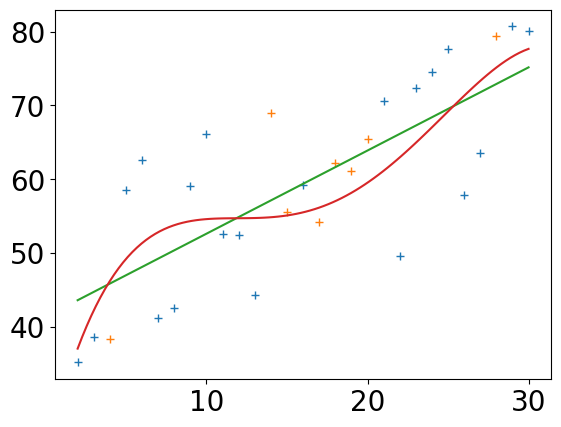

In [84]:
plt.plot(Xtr, Ytr, '+')
plt.plot(Xtest, Ytest, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.show()

### Кроссвалидация
Конкретный выбор валидационной выборки может влиять на результат. А что если усреднить результат нескольких валидаций?

<img src='https://drive.google.com/uc?id=19TOWCsLwIjNSmcHzu46f6JqY5TEefm9h' width=600/>



In [85]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(64, test_size=0.3)
cv

ShuffleSplit(n_splits=64, random_state=None, test_size=0.3, train_size=None)

In [86]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(11):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, X, data.Temperature, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,194.395288,62.286181
1,76.369545,21.823036
2,88.582406,27.132294
3,93.733784,44.492055
4,117.512887,131.938289
5,135.390620,173.747056
6,352.649870,1247.058277
7,342.093896,818.217428
8,16482.121421,107523.513349
9,2356.965460,7725.415989


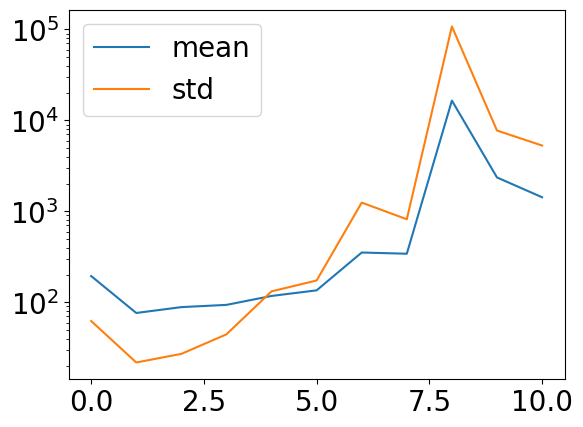

In [87]:
score.plot(logy=True)
plt.show()

76.369545469011

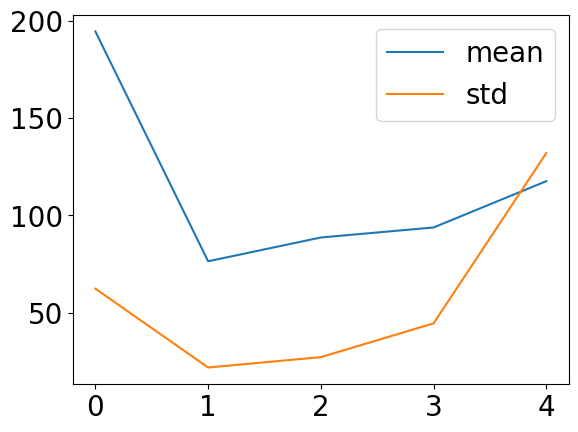

In [88]:
score[:5].plot()
score['mean'].min()

Лучше всего данные обобщает линейная и квадратичная регрессия

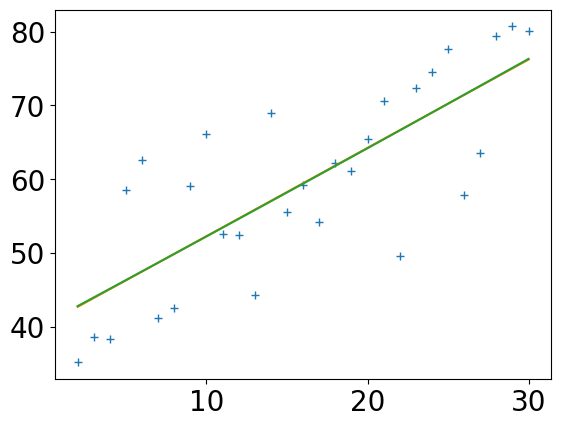

In [89]:
plt.plot(X, data.Temperature, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Temperature).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Temperature).predict(xx))

plt.show()

### Модели с регуляризацией

Первый способ борьбы с переобучением - выбрать менее "сильный" класс функций (меньше параметров).

Второй способ - сузить поиск параметров на области, где их значения "небольшие".

Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели.   
Например, обычная версия линейной регрессии выглядит так:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} \rightarrow \min_{w}.$$

Регуляризованная версия:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_2^2\rightarrow \min_{w}.$$

Такая версия линейной регресси называется **Ridge**-регрессией.  


В **LASSO** мы штрафуем модель  **на сумму модулей всех ее весов** (на l1-норму весов), таким образом:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_1\rightarrow \min_{w}.$$

**ElasticNet** использует как L1, так и L2 регуляризации:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell}  + \lambda_2\left|\left|w\right|\right|_2^2 + \lambda_1\left|\left|w\right|\right|_1 \rightarrow \min_{w}.$$


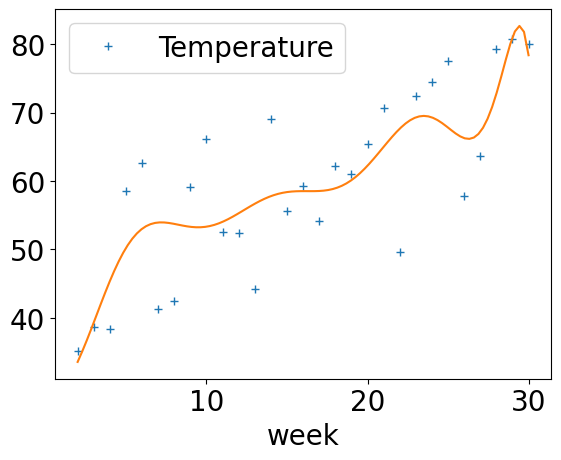

In [90]:
model_poly10 = Pipeline([('poly', PolynomialFeatures(degree=10)),
                         ('linear', LinearRegression(fit_intercept=False))])
model_poly10.fit(X, data.Temperature)
data.plot(style='+')
plt.plot(xx, model_poly10.predict(xx))
plt.show()

In [91]:
# большие значения коэффициентов (весов)
model_poly10['linear'].coef_

array([ 2.07473284e+01,  1.34123925e+01, -8.69881774e+00,  4.13938721e+00,
       -1.00068537e+00,  1.34878991e-01, -1.08669486e-02,  5.36132330e-04,
       -1.58759151e-05,  2.59008544e-07, -1.78897075e-09])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.799e+02, tolerance: 4.880e-01
  model = cd_fast.enet_coordinate_descent(


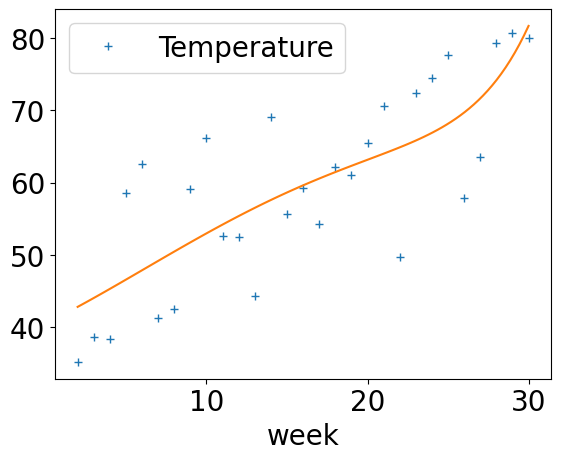

In [92]:
# линейные модели с регуляризацией в sklearn как отдельные классы
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', ElasticNet())])
model.fit(X, data.Temperature)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
plt.show()


In [93]:
# коэффициенты меньше, а модель более "обобщающая"
model['linear'].coef_

array([ 0.00000000e+00,  1.09532330e+00,  3.39240881e-02, -2.01678704e-03,
        1.11660562e-05,  3.64181849e-07,  2.09624384e-09, -4.76024872e-11,
        1.07532962e-12,  2.29644647e-13,  1.46176532e-14])

In [94]:
# кроссвалидацией оценим модель Lasso
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(11):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', Lasso(fit_intercept=False))])
  sc = cross_val_score(model, X, data.Temperature, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+03, tolerance: 7.448e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+03, tolerance: 6.728e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+03, tolerance: 7.506e

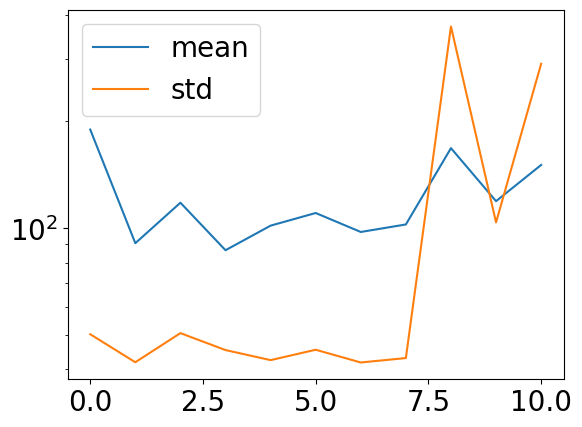

In [95]:
score.plot(logy=True)
plt.show()

Значение ошибок оказалось оптимально на линейной регрессии.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+03, tolerance: 1.074e+01
  model = cd_fast.enet_coordinate_descent(


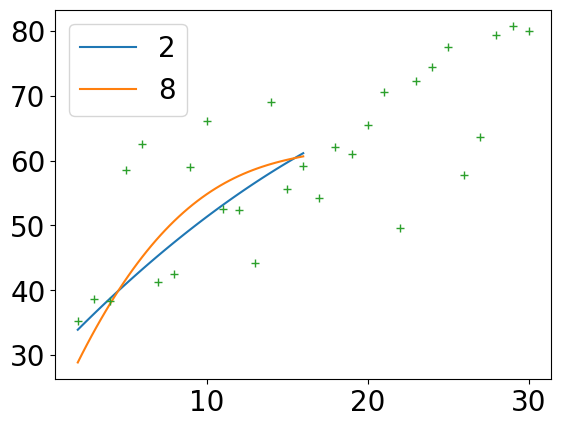

In [96]:
x_ = np.linspace(2, 16).reshape(-1, 1)

pd.DataFrame(
  {n: Pipeline([('poly', PolynomialFeatures(degree=n)),
                 ('linear', Lasso(fit_intercept=False))]).fit(X, data.Temperature).predict(x_)
                 for n in (2, 8)},
  index = x_[:,0]
).plot()
plt.plot(X, data.Temperature, '+')
plt.show()

Полиномы 2 и 8 степени с регуляризацией ведут себя прилично